<h4>Analysing education dataset</h4>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data.csv', sep = ';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data_info = pd.read_csv('data_info.csv')
data_info.head()

,Attribute Name,Role,Type,Description,Units,Missing Values
0,Marital status,Feature,Discrete,1 – single 2 – married 3 – widower 4 – divorce...,1.0,False
1,Application mode,Feature,Discrete,1 - 1st phase - general contingent 2 - Ordinan...,NaN,False
2,Application order,Feature,Discrete,Application order (between 0 - first choice; a...,NaN,False
3,Course,Feature,Discrete,33 - Biofuel Production Technologies 171 - Ani...,NaN,False
4,Daytime/evening attendance,Feature,Discrete,1 – daytime 0 - evening,NaN,False


After looking into the data I realized some issues in the column names which I thought best to alter for uniformity and ease of coding for the analysis.

In [6]:
data = data.rename(columns = {'Nacionality' : 'Nationality', 'Daytime/evening attendance\t' : 'Daytime/evening attendance'})

<b>2.1: What are the subjects that are particularly bad in terms of having high dropout?</b>

Here are the steps I took:

- To determine which subjects have high dropout rates, we first map course codes from the dataset to their corresponding course names using the information provided in data_info.
  
- Filter the dataset for students who dropped out and grouped the data by ‘Course Name’ to count the number of dropouts for each course.

- Compute the total number of students enrolled in each course to establish a baseline for comparison.

- Find the dropout rate for each course by dividing the dropout counts by the total student counts.

- Sorted the courses based on their dropout rates in descending order to highlight those with particularly high dropout proportions.

- Created a bar chart to visually represent the dropout rates of the courses and also printed the summary table for more precision.

In [7]:
course_mapping = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

#adding course name column to data
data['Course Name'] = data['Course'].map(course_mapping)

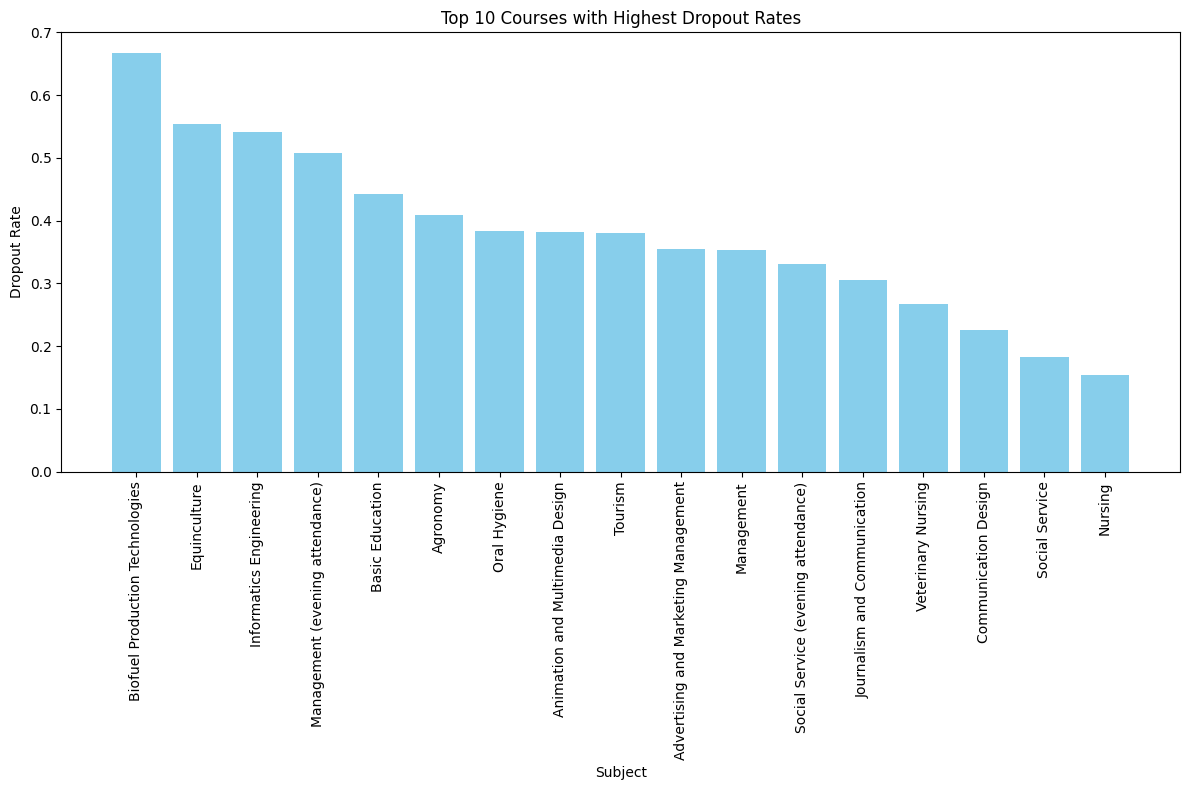

The top 5 courses with highest drop out rates are:

                    Course Name  Dropout Rate
Biofuel Production Technologies      0.666667
                   Equinculture      0.553191
        Informatics Engineering      0.541176
Management (evening attendance)      0.507463
                Basic Education      0.442708


In [8]:
# calculate the number of dropouts
dropout_counts = data[data['Target'] == 'Dropout'].groupby('Course Name').size().reset_index(name='Dropped Out')

# get total number of students in each course
total_counts = data.groupby('Course Name').size().reset_index(name='Total Students')

# merge the dropout counts with total counts
dropout_rates = pd.merge(dropout_counts, total_counts, on='Course Name')

# calculate the dropout rate
dropout_rates['Dropout Rate'] = dropout_rates['Dropped Out'] / dropout_rates['Total Students']

# sort by descending order
dropout_rates = dropout_rates.sort_values(by='Dropout Rate', ascending=False)

# visualization
plt.figure(figsize=(12, 8))
plt.bar(dropout_rates['Course Name'], dropout_rates['Dropout Rate'], color='skyblue')
plt.title('Top 10 Courses with Highest Dropout Rates')
plt.xlabel('Subject')
plt.ylabel('Dropout Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# display the top 5 courses with the highest dropout rates
print("The top 5 courses with highest drop out rates are:\n")
print(dropout_rates[['Course Name', 'Dropout Rate']].head(5).to_string(index=False))

<b>2.2: What are the subjects that are particularly successful?</b>

Assumption: Success can be determined by the graduation rate.
Here are the steps I implement to do find the most successful subjects:

- Used the ‘Course Name’ and ‘Target’ columns to filter and calculate the number of students who graduated from each course.

- Get the total number of enrolled students in each course for a baseline comparison.

- Divide the graduation counts by the total student counts for each course, resulting in a graduation rate for each course.
  
- Sort the courses by graduation rate in descending order to identify the most successful ones.
  
- Create a bar chart of graduation rate for all the courses to provide a clear visual of the most successful subjects. Also printed the top 5 for a better look into the graduation rates.

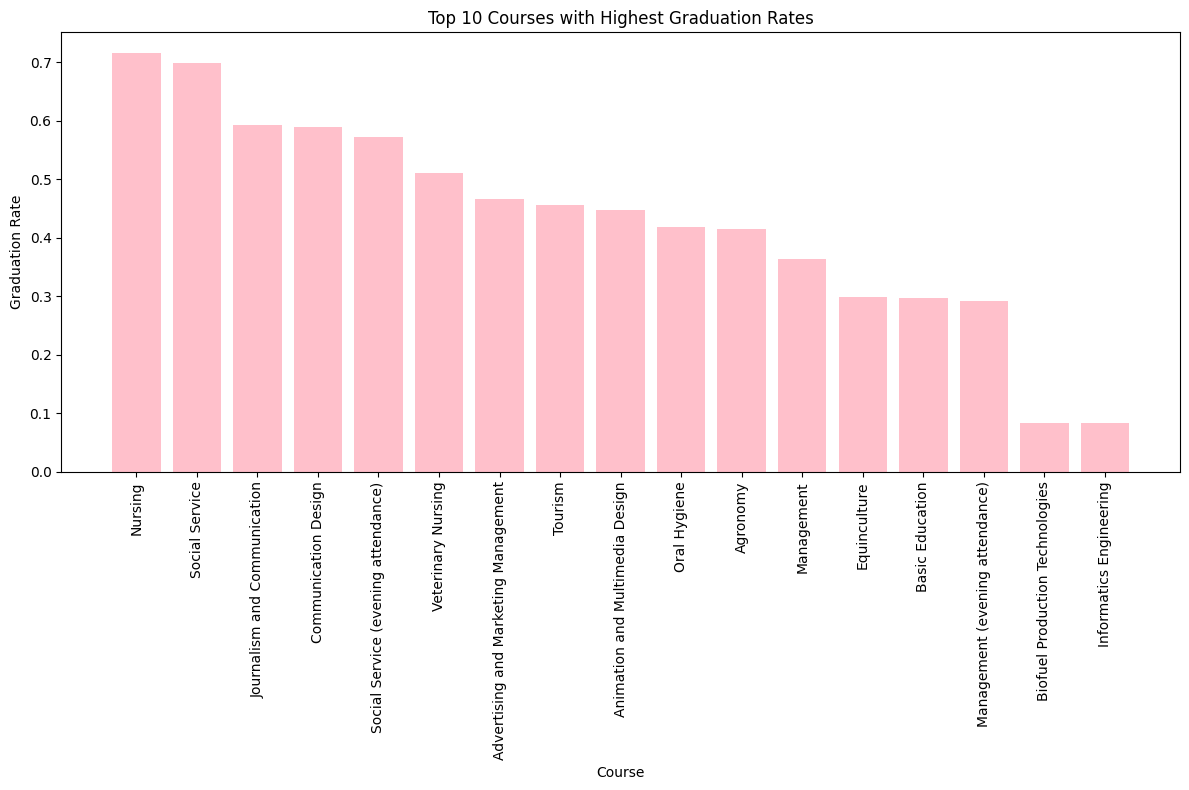

The top 5 courses with highest graduation rates are:

                        Course Name  Graduation Rate
                            Nursing         0.715405
                     Social Service         0.698592
       Journalism and Communication         0.592145
               Communication Design         0.588496
Social Service (evening attendance)         0.572093


In [9]:
# calculate the number of graduates
graduate_counts = data[data['Target'] == 'Graduate'].groupby('Course Name').size().reset_index(name='Graduated')

# merge the graduate counts with total student count
graduation_rates = pd.merge(graduate_counts, total_counts, on='Course Name')

# calculate the graduation rate
graduation_rates['Graduation Rate'] = graduation_rates['Graduated'] / graduation_rates['Total Students']

# sort by descending order
graduation_rates = graduation_rates.sort_values(by='Graduation Rate', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
plt.bar(graduation_rates['Course Name'], graduation_rates['Graduation Rate'], color='pink')
plt.title('Top 10 Courses with Highest Graduation Rates')
plt.xlabel('Course')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# display the top 5 courses with the highest dropout rates
print("The top 5 courses with highest graduation rates are:\n")
print(graduation_rates[['Course Name', 'Graduation Rate']].head(5).to_string(index=False))

<b>2.3: The institution wants to save resources by closing the evening classes. Does
the data support for or against the institution’s plan?</b>

One way to provide a fair analysis would be by checking the dropout and graduation rates by attendance in daytime or evening classes. Here are the steps I took:

- Identify counts of dropouts and graduates for both daytime (1) and evening (0) classes using the 'Daytime/evening attendance' column.

- Divide dropout and graduation counts by the total number of students for each attendance type to get dropout and graduation rate for daytime and evening classes.

- Visualize using a bar chart showing dropout and graduation rates for each attendance type. Also printed the summary for more precise numbers.

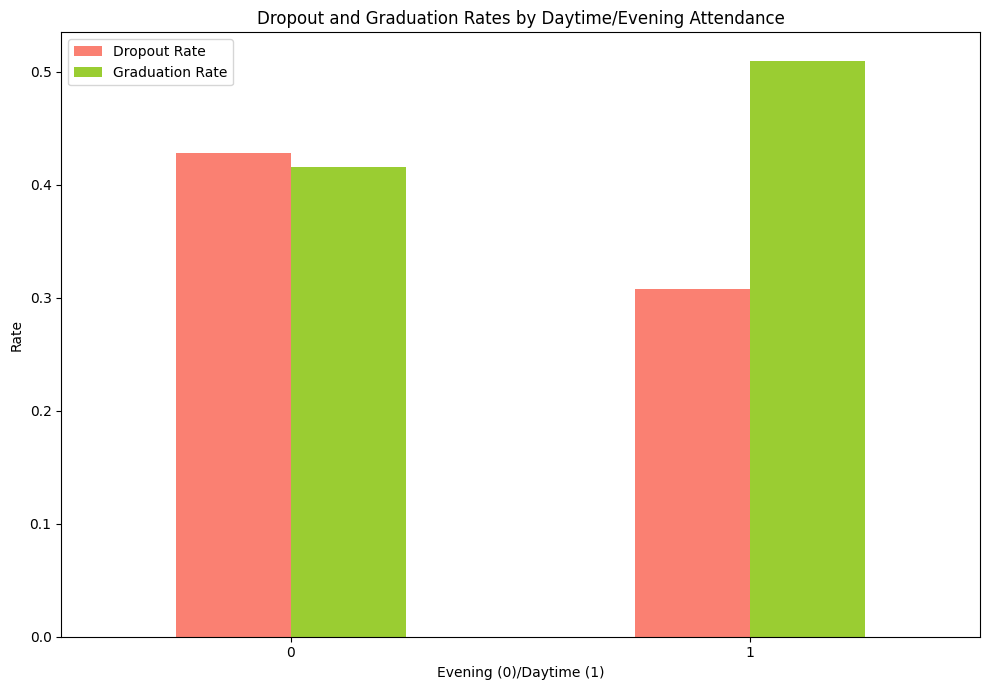

                            Total Students  Dropout Rate  Graduation Rate
Daytime/evening attendance                                               
0                                      483      0.428571         0.416149
1                                     3941      0.308044         0.509515


In [10]:
# calculate dropout and graduation counts for daytime and evening classes
dropout_counts_attendance = data[data['Target'] == 'Dropout'].groupby('Daytime/evening attendance').size()
graduation_counts_attendance = data[data['Target'] == 'Graduate'].groupby('Daytime/evening attendance').size()
total_counts_attendance = data.groupby('Daytime/evening attendance').size()

# calculate dropout & graduation rates
dropout_rate_attendance = dropout_counts_attendance / total_counts_attendance
graduation_rate_attendance = graduation_counts_attendance / total_counts_attendance

# create a summary
attendance_summary = pd.DataFrame({'Total Students': total_counts_attendance,'Dropout Rate': dropout_rate_attendance,'Graduation Rate': graduation_rate_attendance})

# visualization
attendance_summary[['Dropout Rate', 'Graduation Rate']].plot(kind='bar', color=['salmon', 'yellowgreen'], figsize=(10, 7))
plt.title('Dropout and Graduation Rates by Daytime/Evening Attendance')
plt.xlabel('Evening (0)/Daytime (1)')
plt.ylabel('Rate')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# display the summary
print(attendance_summary)


Analysis: Based on the bar plot and the summary table, it's observed that the dropout rates are higher and graduation rates are lower for the evening classes. This can justify shutting down evening classes in order to save resources. It is important to note however, that people attending evening classes may have other responsibilities such as work or family during the day which could interrupt their studies and result in higher dropouts and lower graduation rates. This highlights that there may not be an issue with the course itself but the circumstances of students who choose evening over day classes.

<b>2.4: Is there any correlation between ”Previous qualification (grade)” and ”Admission grade”?</b>

- I chose to visualize using a scatter plot since its the best choice when displaying correlation data.

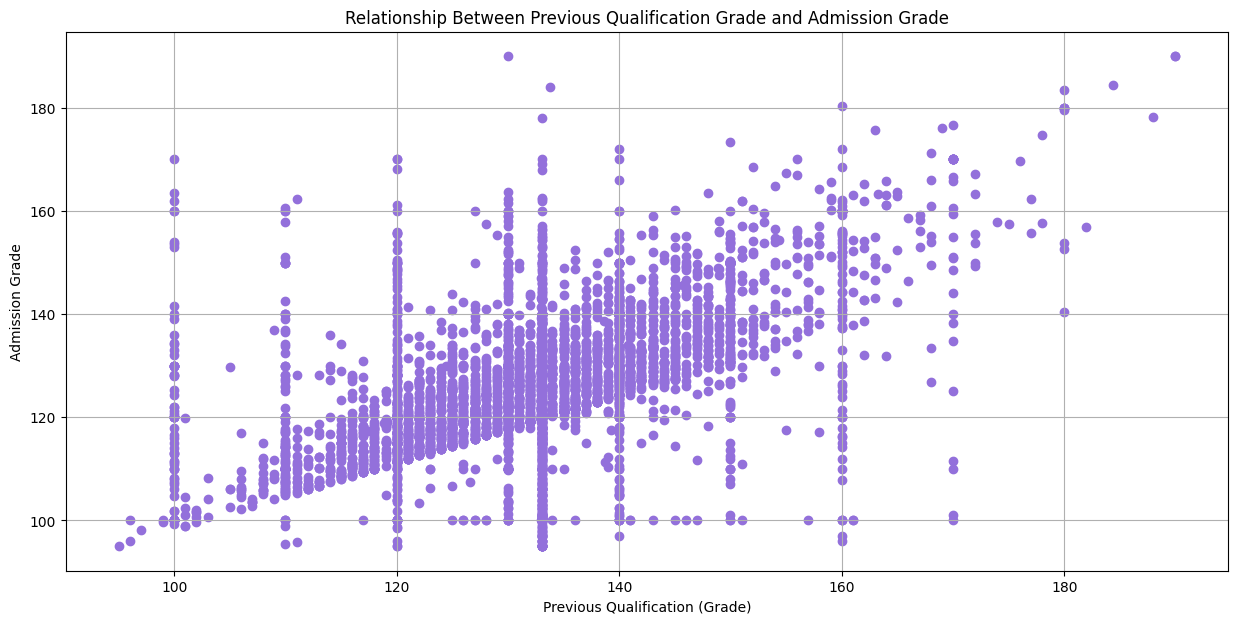

Correlation between Previous Qualification (Grade) and Admission Grade: 0.58


In [11]:
# calculate the correlation between
correlation = data['Previous qualification (grade)'].corr(data['Admission grade'])

# visualization
plt.figure(figsize=(15, 7))
plt.scatter(data['Previous qualification (grade)'], data['Admission grade'], color='mediumpurple')
plt.title('Relationship Between Previous Qualification Grade and Admission Grade')
plt.xlabel('Previous Qualification (Grade)')
plt.ylabel('Admission Grade')
plt.grid(True)
plt.show()

print(f"Correlation between Previous Qualification (Grade) and Admission Grade: {correlation:.2f}")

Analysis: A correlation 0.58 depicts a moderately positive relationship between previous qualification and admission grade. While a good part of the data seems to follow the positive trend, there is a lot of variance as can be observed in the scatter plot which is the reason for the correlation not being very strong.

<b>2.5: How do the female and male students compare in terms of dropout?</b>

By analyzing the 'gender' column against the 'target'(dropout/graduate) column, I calculated and compared dropout rates for female and male students, providing insight into any disparities between the two groups. Here are the steps I took:

- Calculate Dropout Proportions by Gender: Determine the proportion of dropouts for each gender by dividing dropout counts by the total number of students for each gender.
  
- Visualize using a bar chart to compare dropout rates by gender. Also printed the summary for more precise numbers.

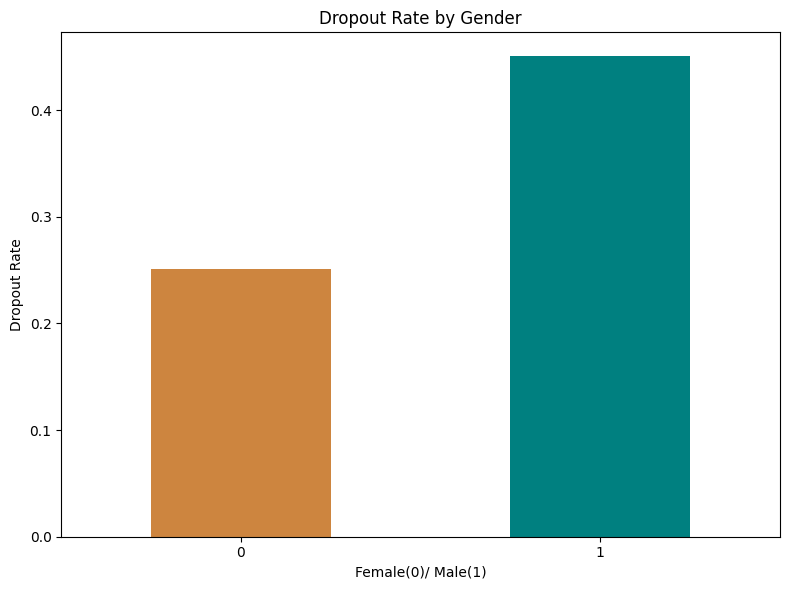

Dropout Rate by Gender:
        Total Students  Dropout Rate
Gender                              
0                 2868      0.251046
1                 1556      0.450514


In [12]:
# calculate total students and dropouts per gender
total_gender_counts = data.groupby('Gender').size()
dropout_gender_counts = data[data['Target'] == 'Dropout'].groupby('Gender').size()

# calculate dropout rate by gender
dropout_rate_gender = dropout_gender_counts/ total_gender_counts

# create a summary
gender_summary = pd.DataFrame({'Total Students': total_gender_counts,'Dropout Rate': dropout_rate_gender})

# visualization
plt.figure(figsize=(8, 6))
gender_summary['Dropout Rate'].plot(kind='bar', color=['peru', 'teal'])
plt.title('Dropout Rate by Gender')
plt.xlabel('Female(0)/ Male(1)')
plt.ylabel('Dropout Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# display the summary table
print("Dropout Rate by Gender:")
print(gender_summary)

Analysis: There is a notable difference in dropout rates between female and male students, with the dropout rate for females being nearly half that of males. This trend may warrant further investigation to understand the underlying causes and address any potential disparities.

<b>2.6: What is the age at enrolment, at which we see a turning point from more
graduate to more dropout?</b>

To find the turning point from more graduates to more dropouts by age, I calculated the proportion of dropout and graduate counts for each age. The "turning point" is the age where the dropout proportion surpasses the graduate proportion. Here are the steps I took to implement this:

- Calculate Proportion of Dropouts and Graduates by Age: Divide dropout and graduate counts by the total number of students for each age.
  
- Identify the Turning Point: Find the first age where the dropout proportion exceeds the graduate proportion.

- Visualize using a line chart since it fits the task best and gives a clear visual of changing dynamics between graduation and dropout rates at all enrollment ages.

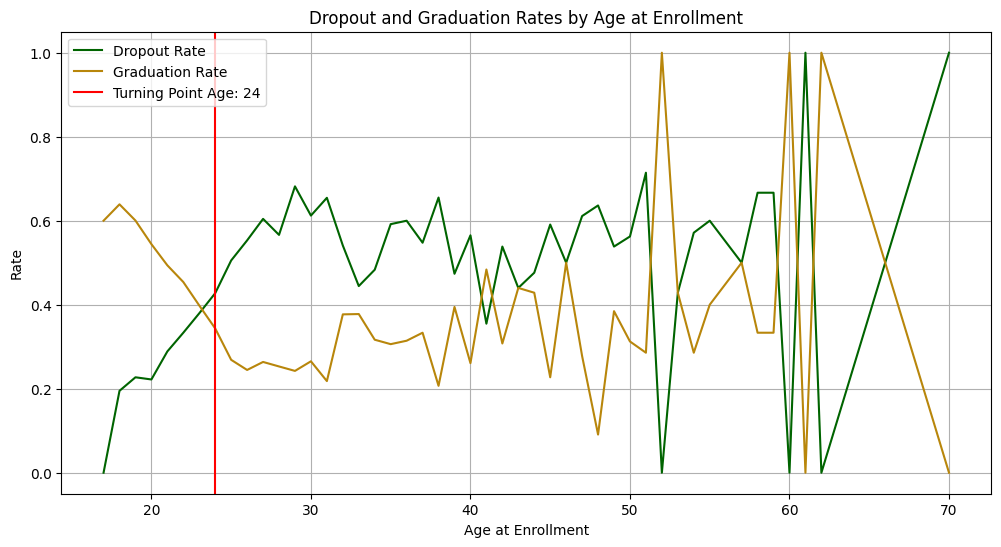

The turning point age from more graduates to more dropouts is: 24


In [13]:
# calculate dropout and graduation counts per every age at enrollment
dropout_counts_age = data[data['Target'] == 'Dropout'].groupby('Age at enrollment').size()
graduation_counts_age = data[data['Target'] == 'Graduate'].groupby('Age at enrollment').size()
total_counts_age = data.groupby('Age at enrollment').size()

# calculate dropout and graduation rates for each age
dropout_rate_age = dropout_counts_age / total_counts_age
graduation_rate_age = graduation_counts_age / total_counts_age

# create summary and fill empty values
age_summary = pd.DataFrame({'Dropout Rate': dropout_rate_age, 'Graduation Rate': graduation_rate_age}).fillna(0)

# finding the turning point age for when there are more dropouts than graduates
age_summary['Turning Point'] = age_summary['Dropout Rate'] > age_summary['Graduation Rate']
turning_point_age = age_summary[age_summary['Turning Point']].index.min()

# visualization
plt.figure(figsize=(12, 6))
plt.plot(age_summary.index, age_summary['Dropout Rate'], label='Dropout Rate', color='darkgreen')
plt.plot(age_summary.index, age_summary['Graduation Rate'], label='Graduation Rate', color='darkgoldenrod')
plt.axvline(turning_point_age, color='red', linestyle='-', label=f'Turning Point Age: {turning_point_age}')
plt.title('Dropout and Graduation Rates by Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Rate')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print(f"The turning point age from more graduates to more dropouts is: {turning_point_age}")

Analysis: The very first instance of dropout rates exceeding graduation rates is at the age 24. The plot also shows a lot of noise at it approaches the end of the 'age at enrollment'. This is explained by the sparse count at a certain ages. For instance, íf there is only one person enrolled at the age of 60, then that persons' graduation/dropout would be the sole determiner of how that age is represented on this plot.  